In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plt'yi tanımlamak için gerekli
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-data/spotify.csv


GÖZETİMLİ ÖĞRENME

In [11]:
df=pd.read_csv("/kaggle/input/spotify-data/spotify.csv")

In [12]:
df.info() #veriye dair genel bir bilgi edinmemizi sağlar 174389x19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [13]:
df.describe() #verilerin özetini sunar 

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [14]:
#verinin içeriiğini 5 satırını daha detaylı görmüş oluyoruz

df = pd.read_csv("/kaggle/input/spotify-data/spotify.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [15]:
# verilerimizin içeriğinin ilk 10 satırını görüyoruz

df = pd.read_csv("/kaggle/input/spotify-data/spotify.csv")
df.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [16]:
# Eksik veri var mı kontrol et
print(df.isnull().sum())

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


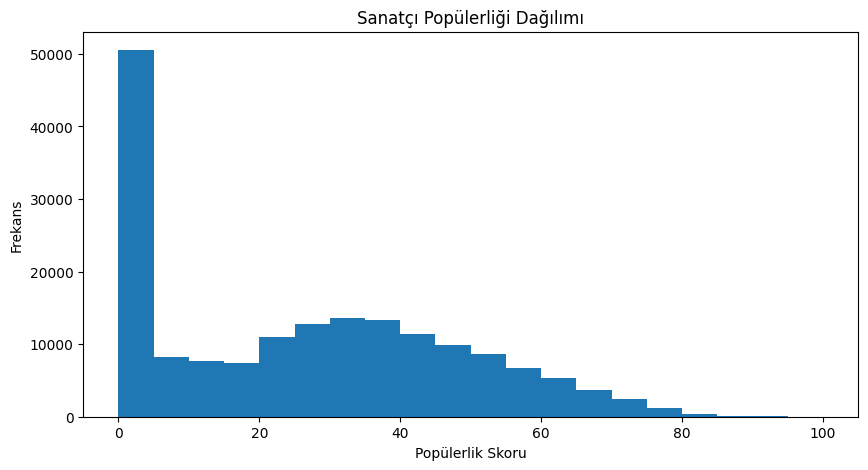

In [17]:
# Popülarite dağılımı  
plt.figure(figsize=(10,5))
plt.hist(df['popularity'], bins=20)
plt.title('Sanatçı Popülerliği Dağılımı')
plt.xlabel('Popülerlik Skoru')
plt.ylabel('Frekans')
plt.show()

In [18]:
print(df.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [19]:
# Sanatçıları popülerliklerine göre sıralama büyükten küçüğe sıralama
sorted_artists = df[['artists', 'popularity']].drop_duplicates().sort_values(by='popularity', ascending=False)

# İlk 10 popüler sanatçıyı görelim
print(sorted_artists.head(10))

                            artists  popularity
20062            ['Olivia Rodrigo']         100
19862     ['24kGoldn', 'iann dior']          96
19866             ['Ariana Grande']          96
19976                   ['KAROL G']          95
19886  ['Bad Bunny', 'Jhay Cortez']          95
19872             ['The Kid LAROI']          94
19870                        ['CJ']          94
19868             ['Ariana Grande']          94
19876             ['Billie Eilish']          94
19928      ['Bad Bunny', 'ROSALÍA']          94


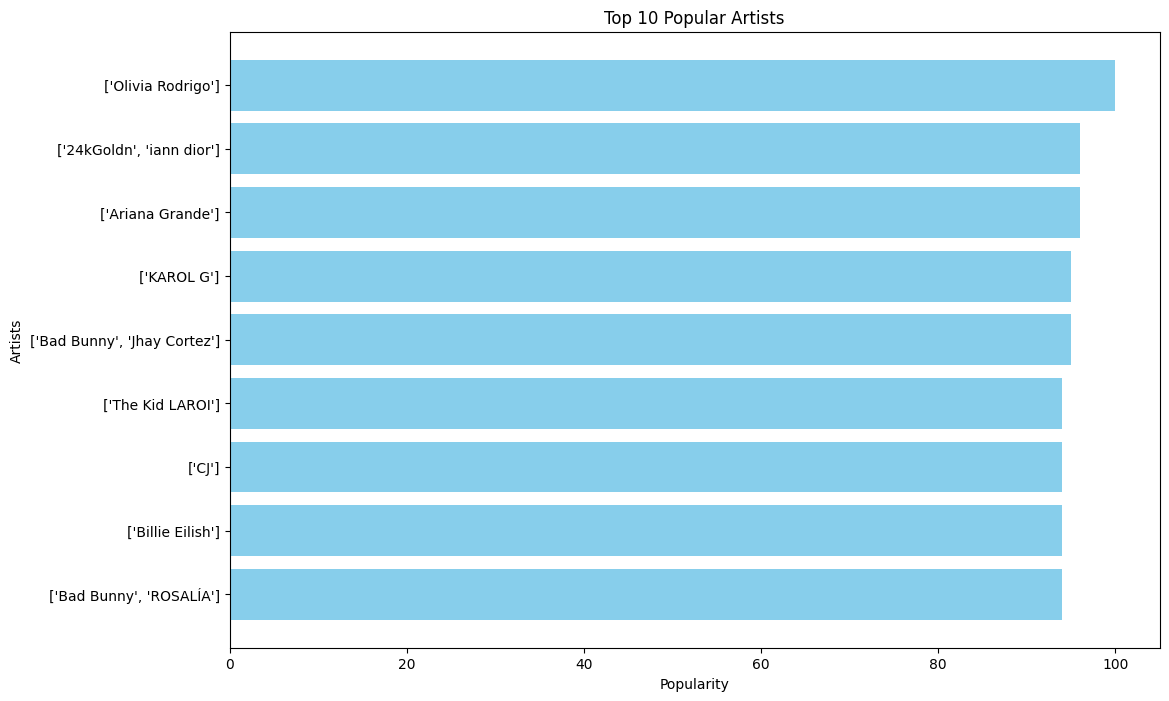

In [20]:

# Sanatçıları popülerlik skoruna göre sıralama büyükten küçüğe sıralatır
sorted_artists = df[['artists', 'popularity']].drop_duplicates().sort_values(by='popularity', ascending=False)

#  tablo için ilk 10 popüler sanatçıyı tablo olarak oluşturup 
top_10_artists = sorted_artists.head(10)

# grafiği oluşturma
plt.figure(figsize=(12, 8))
plt.barh(top_10_artists['artists'], top_10_artists['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.title('Top 10 Popular Artists')
plt.gca().invert_yaxis()  # en popüler sanatçının üstte olması için Y eksenini ters çevirerek yapar
plt.show()

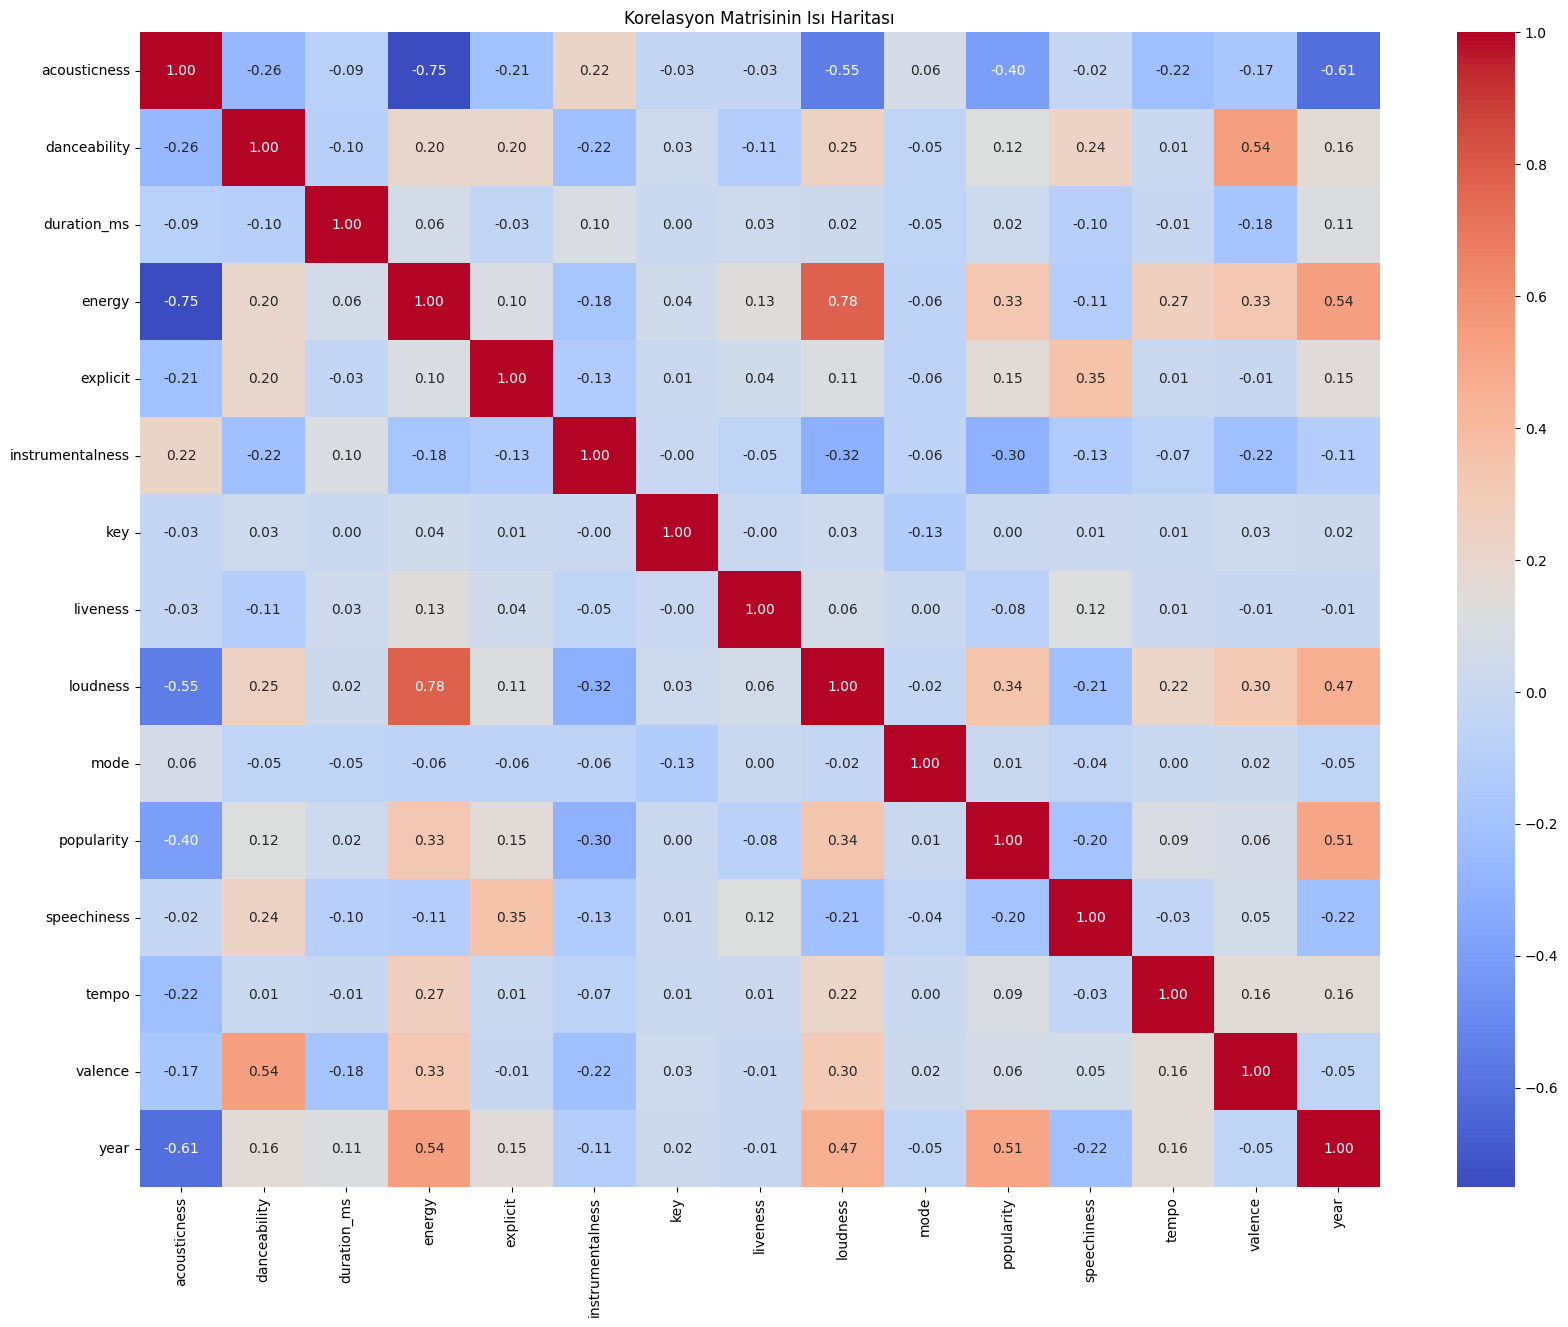

In [21]:
##veri çerçevesinde bulunan ve sayısal veri türü olan sütunları seçer 
##corr methoduyla sayısal çoğunlukta olan verileri belirler
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Isı haritasını oluşturma
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisinin Isı Haritası')
plt.show()


In [22]:
cor_target = abs(corr_matrix['popularity'])# abs mutlak değer sağlar

# Korelasyon değeri 0.1 den büyük ve küçük olan özellikleri seçmek için
relevant_features = cor_target[cor_target > 0.1]
to_drop = cor_target[cor_target<0.1]
to_drop_frame = to_drop.to_frame()
print(relevant_features)
print("-------------------------")
print(to_drop)
print("-------------------------")
print(to_drop_frame)

acousticness        0.396744
danceability        0.123746
energy              0.328939
explicit            0.152545
instrumentalness    0.300625
loudness            0.337194
popularity          1.000000
speechiness         0.195329
year                0.513227
Name: popularity, dtype: float64
-------------------------
duration_ms    0.024717
key            0.001951
liveness       0.078959
mode           0.007652
tempo          0.094985
valence        0.063471
Name: popularity, dtype: float64
-------------------------
             popularity
duration_ms    0.024717
key            0.001951
liveness       0.078959
mode           0.007652
tempo          0.094985
valence        0.063471


In [23]:
# Düşük korelasyonlu sütunların isimlerini alır
row_names = to_drop_frame.index

# Hedef değişken popularity adı ile listeyi güncelle  x özelikler y hedef değişken
row_names_list = list(row_names)
row_names_list.append('popularity')

# Özellikler (X) ve hedef değişken (y) hazırlama
X = df.drop(columns=row_names_list).values
y = df['popularity'].values

print("Özellikler (X) şekli:", X.shape)
print("Hedef değişken (y) şekli:", y.shape)

Özellikler (X) şekli: (174389, 12)
Hedef değişken (y) şekli: (174389,)


In [24]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Lojistik regresyon, Spotify popülarlık verileriyle sanatçıları popülarlık seviyelerine göre sınıflandırabilir, olasılık tahminleri yapabilir ve özelliklerin etkisini analiz edebilir.

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirmek için 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lojistik regresyon modelini oluştur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model doğruluğu: {accuracy:.2f}")


Model doğruluğu: 1.00


GÖZETİMSİZ ÖĞRENME

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [28]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


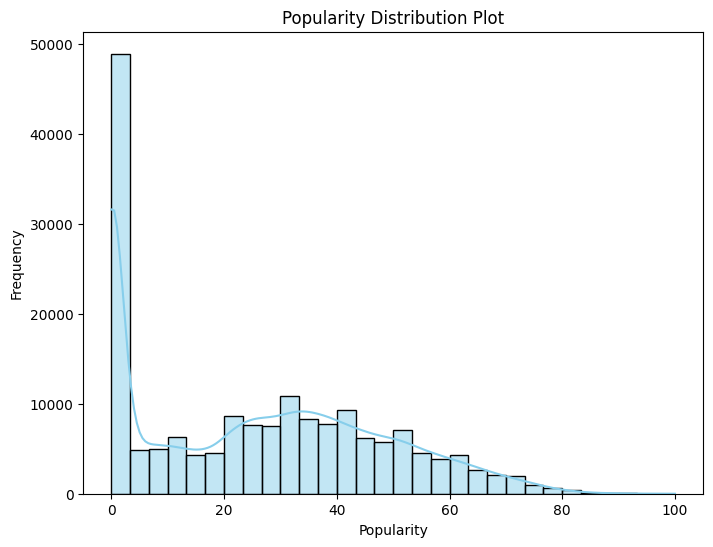

In [29]:

plt.figure(figsize=(8, 6))
plt.title('Popularity Distribution Plot')
sns.histplot(df['popularity'], kde=True, color='skyblue', bins=30)  # KDE ile birlikte histogram
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

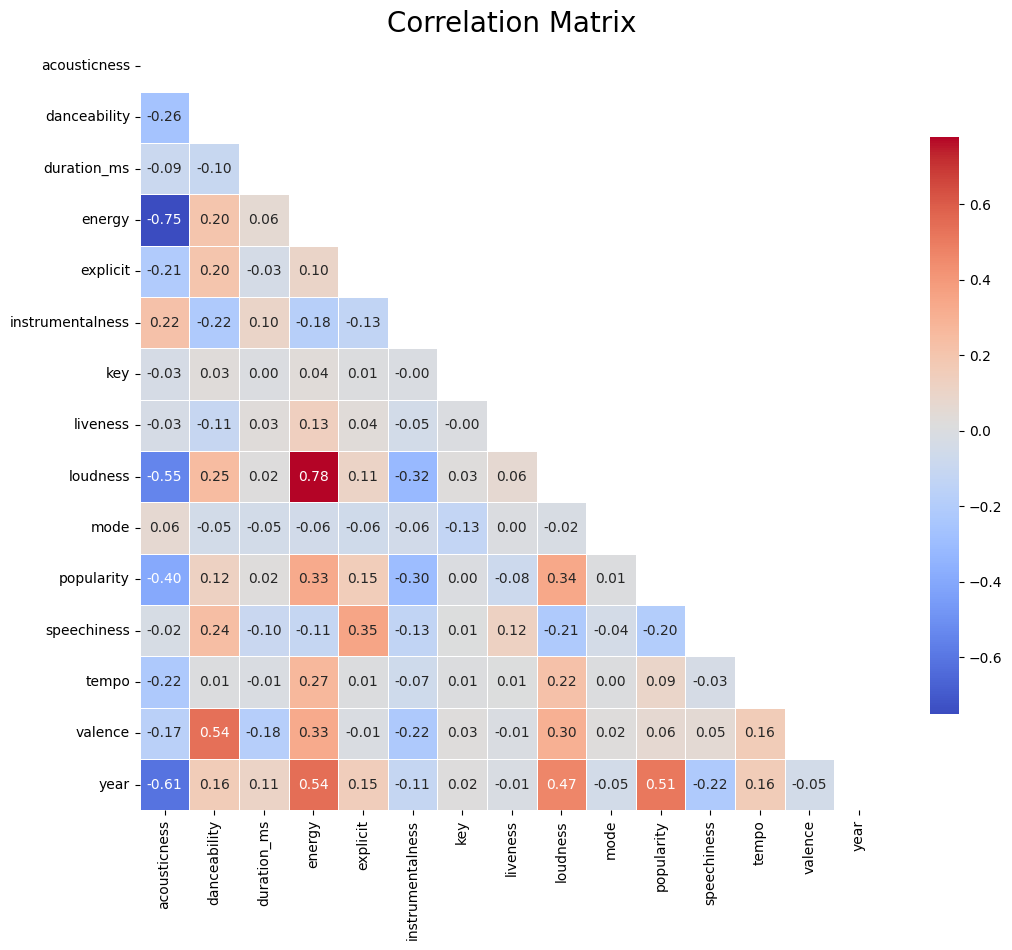

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesapla
corr = numeric_df.corr()

#  sayısal verileri kullanmak için bool kullanılır
mask = np.triu(np.ones_like(corr, dtype=bool))

# Grafik oluştur
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix', fontsize=20)
plt.show()


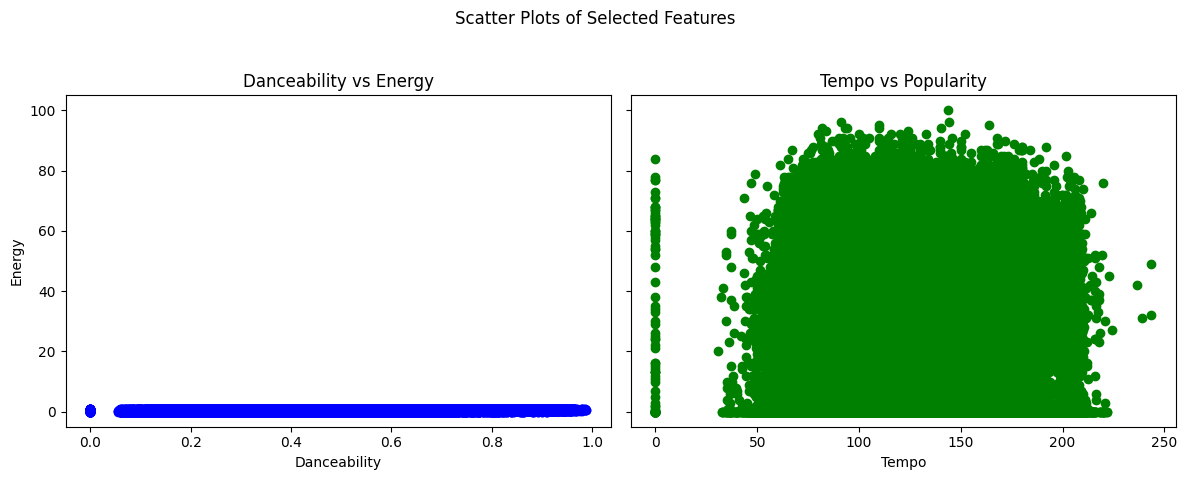

In [34]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


axs[0].scatter(df["danceability"], df["energy"], color='blue')
axs[0].set_xlabel('Danceability')
axs[0].set_ylabel('Energy')
axs[0].set_title('Danceability vs Energy')


axs[1].scatter(df["tempo"], df["popularity"], color='green')
axs[1].set_xlabel('Tempo')
axs[1].set_title('Tempo vs Popularity')


fig.suptitle('Scatter Plots of Selected Features')

# Grafikleri göster
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [32]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


print(df.head())


   acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.

In [101]:

features = df[['danceability', 'energy', 'loudness', 'tempo']]

#  veride eksik değerleri kontrol etmek için kullanılır
print(features.isnull().sum())


danceability    0
energy          0
loudness        0
tempo           0
dtype: int64


In [103]:
#eksik değer olsaydı değeri dolduracaktı
features = features.fillna(features.mean())
print(features)

        danceability  energy  loudness    tempo
0              0.598   0.224   -12.628  149.976
1              0.852   0.517    -7.261   86.889
2              0.647   0.186   -12.098   97.600
3              0.730   0.798    -7.311  127.997
4              0.704   0.707    -6.036  122.076
...              ...     ...       ...      ...
174384         0.792   0.866    -5.089  125.972
174385         0.429   0.211   -11.665   94.710
174386         0.671   0.589   -12.393  108.058
174387         0.462   0.240   -12.077  171.319
174388         0.677   0.460   -12.237  112.208

[174389 rows x 4 columns]


In [106]:
# Özellikleri normalleştirmek ve DataFrame ile matrise çeviririz
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print(features_scaled_df.head())


   danceability    energy  loudness     tempo
0      0.347919 -0.948791 -0.154111  1.089753
1      1.790898  0.125710  0.788862 -0.995485
2      0.626289 -1.088146 -0.060991 -0.641450
3      1.097814  1.156204  0.780077  0.363273
4      0.950107  0.822485  1.004092  0.167564


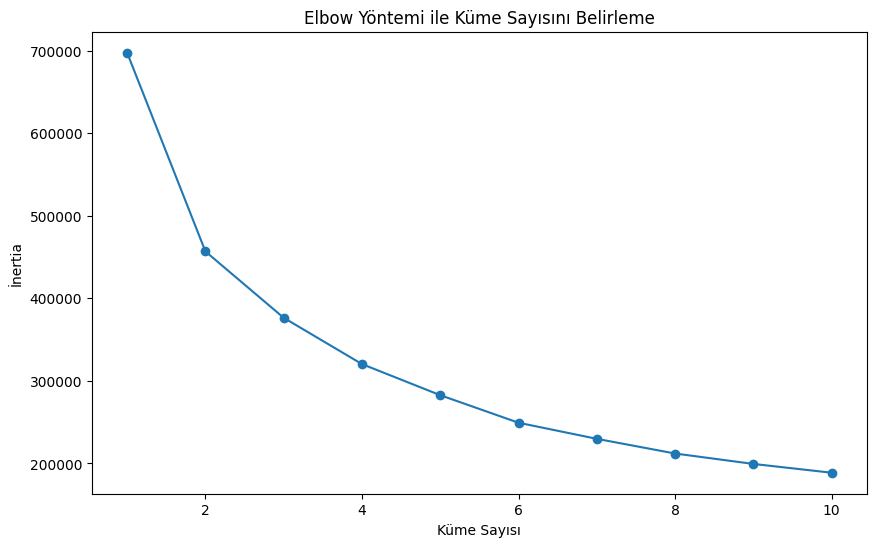

In [107]:
#matplotlib.pyplot methoduyla grafik haline getirip kırılma noktalarını inceliyoruz
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('İnertia')
plt.title('Elbow Yöntemi ile Küme Sayısını Belirleme')
plt.show()


In [108]:
#Verilerinizi kümelere ayırarak müzük özelliklerin benzerliğine göre kümelenir.
# Bu verilerimizi daha iyi anlamanızı ve belirli müzik özelliklerinin kümeler üzerindeki etkilerini inceleyip yorumlamamızı sağlar.
# En uygun küme sayısını belirleyin (örneğin 5)
optimal_clusters = 5

# K-Means kümeleme
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

print(df[['danceability', 'energy', 'loudness', 'tempo', 'cluster']].head())

   danceability  energy  loudness    tempo  cluster
0         0.598   0.224   -12.628  149.976        2
1         0.852   0.517    -7.261   86.889        1
2         0.647   0.186   -12.098   97.600        0
3         0.730   0.798    -7.311  127.997        1
4         0.704   0.707    -6.036  122.076        1


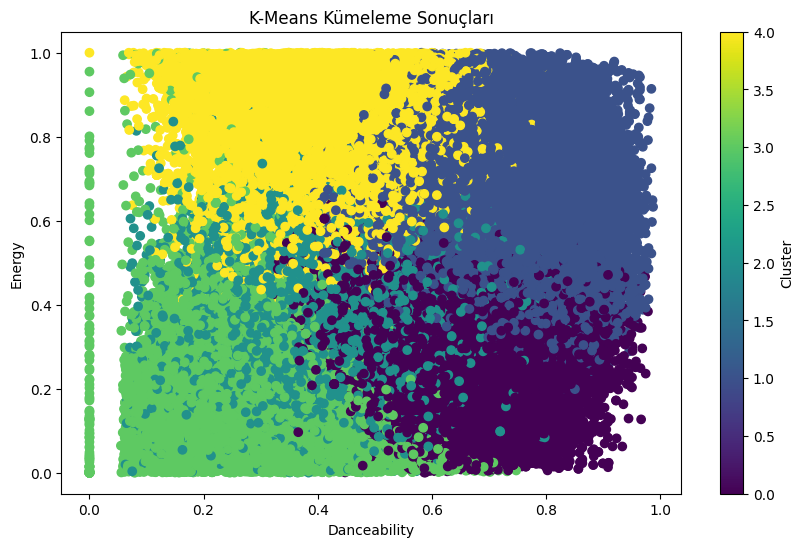

In [109]:
#kümenin görselleştirilmiş hali
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], c=df['cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-Means Kümeleme Sonuçları')
plt.colorbar(label='Cluster')
plt.show()

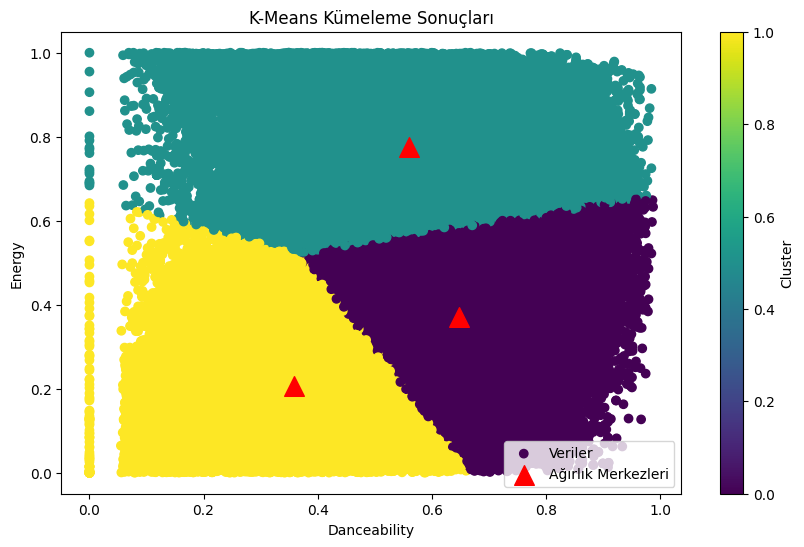

In [119]:
from sklearn.cluster import KMeans

# iki özellik seçiyoruz tablonun tutarlı olması için
X = df[['danceability', 'energy']]

# KMeans modelini tanımlama ve eğitme
kmeans = KMeans(n_clusters=3, random_state=42)  
df['cluster'] = kmeans.fit_predict(X)



# Kümeleme sonuçlarını görselleştirmek için matplotlib.pyplot methodu kullanıyoruz
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], c=df['cluster'], cmap='viridis', label='Veriler')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-Means Kümeleme Sonuçları')

# Ağırlık merkezlerini çizmek için scatter ve legend methodu kullanılır
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='^', label='Ağırlık Merkezleri')

plt.colorbar(label='Cluster')
plt.legend()
plt.show()

Ağırlık merkezleri, her kümenin ortalama danceability ve energy değerlerini temsil eder ve kümeler arasındaki farklılıkları göstermektedir. Bu analiz, şarkılarınızın genel eğilimlerini ve hangi müzik türlerinin belirgin olduğunu anlamamıza yardımcı olur.

In [33]:
#boyut azaltma veri kaybını inceleme
numeric_columns = ['acousticness', 'danceability', 'energy', 'loudness', 'tempo']
X = df[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

print(f"Orijinal veri setinin boyutu: {X.shape}")
print(f"PCA sonrası veri setinin boyutu: {X_pca.shape}")

Orijinal veri setinin boyutu: (174389, 5)
PCA sonrası veri setinin boyutu: (174389, 4)


Boyut Azaltma sonucu orijinal veri setimizde 5 özellik vardı, ancak PCA sonrası bu özellikler 4 temel bileşene indirgenmiştir. Bu, veri setindeki bilgi kaybı olmaksızın boyutun azaldığını ve modellememizin daha etkili hale geldiğini göstörüyoruz.